<a href="https://colab.research.google.com/github/CatarinaRRF/Churn_Alura_Voz/blob/main/Relat%C3%B3rio_de_An%C3%A1lise_III_Modelagem_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="display: inline; margin: 15px 0;" title="heartica_logo" src= https://raw.githubusercontent.com/CatarinaRRF/Churn_Alura_Voz/main/data/external/logo_alura_voz.png alt="" width="50" height="50"/><font color=2C3E50> **Ralatório de Análise III - Modelagem dos dados**</font>

<hr color ='2C3E50' size="10">

<font size="3.5">
<nav>
<a href='https://colab.research.google.com/drive/1D_-bOaoy-H7ybiezjz6tnRLLnJIYbpMz#scrollTo=5S96UuX-kSan'> Relatório I - Tratamento dos dados</a> ||
<a href='https://colab.research.google.com/drive/1pXJfmpMAZNaCfHaY-jMq-utUTGe3qHxl#scrollTo=6zK8HXbAiKIS'>Ralatório II - Visualização de Dados</a> ||
<a href='https://colab.research.google.com/drive/1dr5ARLZ5a0NRIaGm5Lr5mPavn4hyNwVj'>Relatório de Análise IV - Dashboard</a> ||
<a href='https://github.com/CatarinaRRF/Churn_Alura_Voz'>Github</a> ||

</nav>

# <font color=2C3E50> **01. Introdução**

O aprendizado de máquina é uma técnica em que os computadores são capazes de aprender com base nas respostas esperadas, correlacionando dados diferentes, que podem ser imagens, números e tudo o que a tecnologia pode reconhecer.
Quando trabalhamos com projetos de machine learning, vários passos são necessários para que o projeto fique completo. Para que nenhum ponto seja esquecido utiliza-se uma pipeline.<br>
A **Pipeline** é um conjunto de ações que muda os dados brutos (muitas vezes confusos e não tabelados) de várias fontes (pesquisas, tabelas geradas na empresa ou avaliações de clientes) para um formato compreensível. Assim, é possível armazenar e utilizar cada um desses dados para análises futuras. Os projetos de **machine learning são processos contínuos** e isso implica em retornar aos pontos iniciais do pipeline sempre que for necessário. As etapas do pipeline são:

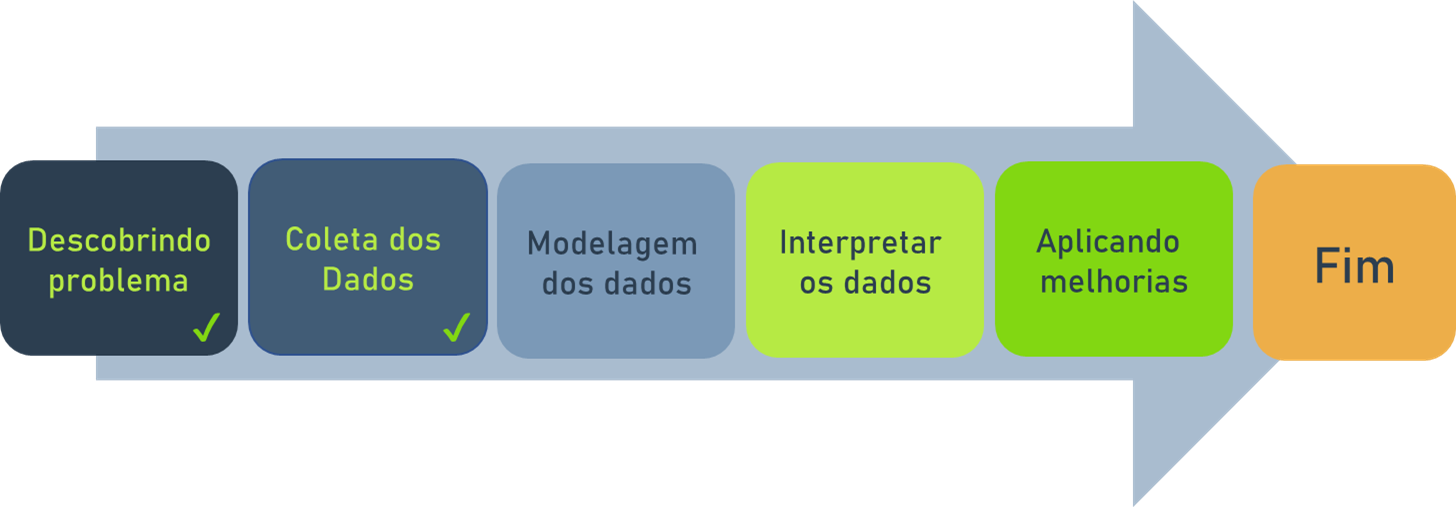

# <font color=2C3E50>**02. Iniciando**

In [1]:
pep = !pip install -U imbalanced-learn
pepis = !pip install pandas-profiling==3.1.0

<font color=82D712> **Importando Bibliotecas**

In [2]:
#Pacotes Basicos
import pandas as pd
import pandas_profiling
import numpy as np

#Visualição
import seaborn as sns
sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline

In [3]:
# Criação de modelos
from sklearn.model_selection import train_test_split

#Visualisação de Arvore
import graphviz
from sklearn.tree import export_graphviz

<font color=82D712> **Importando o DataFrame**

In [4]:
url = 'https://raw.githubusercontent.com/CatarinaRRF/Churn_Alura_Voz/main/data/processed_data.csv'

df_aluravoz = pd.read_csv(url)
df_aluravoz = df_aluravoz.rename (columns = {'Internet_Fiber optic':'Internet_Fiber_Optic'})
df_aluravoz.head()

,Churn,Sexo,Idoso,Parceiros,Dependentes,Tenure,Telefonia,Multiplas_Linhas,Segurança_On-line,Backup_On-line,...,Cobrança_Diário,Cobrança_Mensal,Cobrança_Total,Contrato_Mensal,Contrato_Anual,Contrato_Bianual,Pagamento_Transferência(Auto),Pagamento_Cartão_Crédito(Auto),Pagamento_Cheque_Eletronico,Pagamento_Cheque_Email
0,0,1,0,1,1,9,1,0,0,1,...,2.15,65.6,593.30,0,1,0,0,0,0,1
1,0,0,0,0,0,9,1,1,0,0,...,1.96,59.9,542.40,1,0,0,0,0,0,1
2,1,0,0,0,0,4,1,0,0,0,...,2.42,73.9,280.85,1,0,0,0,0,1,0
3,1,0,1,1,0,13,1,0,0,1,...,3.21,98.0,1237.85,1,0,0,0,0,1,0
4,1,1,1,1,0,3,1,0,0,0,...,2.75,83.9,267.40,1,0,0,0,0,0,1


In [5]:
df_aluravoz.drop(['Cobrança_Total','Cobrança_Diário'], axis = 1, inplace=True)

### <font color=82D712> **Criando Funções Globais**

In [6]:
#Função da criação de modelo

def executar_classificador(classificador, X_train, X_test, y_train):
  modelo = classificador.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)
  return y_pred

In [7]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

#crinado um mapa de cores
paleta = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#2C3E50","#415C76","#B6EA44","#82D712"])

#vars
labels = ["True Neg","False Pos","False Neg","True Pos"]

#Função da Validação da arvore de função

def metricas(y_test, y_pred):
  print("O modelo tem a de Acurácia: %.2f%%" %(metrics.accuracy_score(y_test, y_pred)*100))
  print("O modelo tem a de Precisão: %.2f%%" %(metrics.precision_score(y_test, y_pred)*100))
  print("O modelo tem o de Recall: %.2f%%" %(metrics.recall_score(y_test, y_pred)*100)) 
  print("O modelo tem o de F1: %.2f%%" %(metrics.f1_score(y_test, y_pred)*100))
  print("")
  print("A matrix de confusão do modelo é:")
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(include_values=True, cmap=paleta)
  #plt.set_xlabel(xlabels='Classificação Predita')
  #plt.set_ylabel(ylabels='Classificação Real')
  plt.grid(False)

In [8]:
# curva roc

def curva_roc(modelo, x_test, y_test):
  y_pred_proba = modelo.predict_proba(x_test)[::,1]
  fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  #plt
  plt.title('Curva ROC', fontdict={'fontsize': 16})
  plt.rcParams['figure.figsize'] = (6,4)
  plt.plot(fpr, tpr, label='Lr auc'+str(auc), color='#2C3E50')
  plt.plot([0,1],[0,1], color='#82D712', lw=2, linestyle='--')
  plt.legend(loc=4)
  
  return plt.show()

In [9]:
#Função de Visualisação do modelo

def visualizacao_arvore (classificador):
  dot_data = export_graphviz(classificador, 
                           filled=True, rounded=True, class_names= ['não é fraude', 'Fraude'])
  grafico = graphviz.Source(dot_data)
  return grafico

# <font color=2C3E50>**03. Balanceando os Dados**

Ao se analizar a variavel target (churn) é possivel notar que nos dados existe uma quantidade desbalanceada de clientes que não evadiram para os que evadiram, observe:

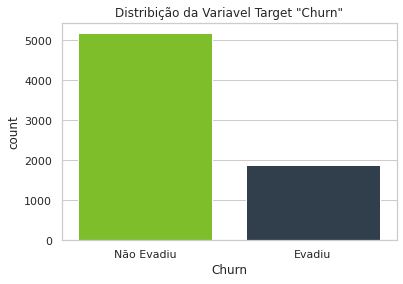

In [10]:
fig, axs = plt.subplots()
ax = sns.countplot(x="Churn", data=df_aluravoz, orient='h', palette=['#82D712', '#2C3E50'])
ax.set(xticklabels=('Não Evadiu', 'Evadiu'), title='Distribição da Variavel Target "Churn"')
fig.show()

Ao construir um modelo com a variável target desbalanceada, podemos ter uma interpretação incorreta de que o modelo está se saindo muito bem, levando em consideração a *métrica acurácia*. Dessa forma, torna-se importante a análise de outras métricas como o *recall* e a *precisão*.</br>
Quando essas métricas apresentam um desempenho ruim e a acurácia tem um desempenho muito bom, é um sinal de que o resultado está sendo influenciado pelos **dados desbalanceados**. Para corrigir esse problema, existem técnicas que podem ser utilizadas para realizar o balanceamento dos dados na tentativa de melhorar o desempenho do modelo.</br> Será então, usada a técnica <font color=82D712>**Oversampling**</font>

<font color=82D712> **Importando Classificador**

In [11]:
from imblearn.over_sampling import SMOTE

<font color=82D712> **Balanceando ...**

In [12]:
x = df_aluravoz.drop('Churn', axis=1)
y = df_aluravoz['Churn']

In [13]:
SEED = 10
smote = SMOTE(random_state=SEED)

x_resampled, y_resampled = smote.fit_resample(x,y)

In [14]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)

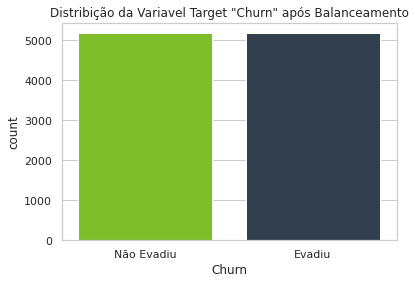

In [15]:
fig, axs = plt.subplots()
ax = sns.countplot(x="Churn", data=df_balanced, orient='h', palette=['#82D712', '#2C3E50'])
ax.set(xticklabels=('Não Evadiu', 'Evadiu'), title='Distribição da Variavel Target "Churn" após Balanceamento')
fig.show()

---


<font color=82D712 size="5">**Conclusões**</font>

Os dados agora estão balanceados e podemos então, partir para o treino de modelos.




# <font color=2C3E50>**04. Treinando modelos**

<font color=82D712> <b>Test Split

In [16]:
x = df_balanced.iloc[:,1:].values
y = df_balanced.iloc[:,0].values

x_train, x_test, y_train, y_test = train_test_split (x, y, random_state=SEED)

<font color=82D712><b> Dummy Classifier

Para poder realmente entender e melhorar o desempenho do nosso modelo, primeiro precisamos estabelecer uma linha de base para os dados que temos. O modelo <b>DummyClassifier</b> analisa essencialmente qual rótulo é mais frequente no conjunto de dados de treinamento e faz previsões com base nesse rótulo. <sup><a href = 'https://towardsdatascience.com/why-using-a-dummy-classifier-is-a-smart-move-4a55080e3549'>[1]</a>

In [17]:
from sklearn.dummy import DummyClassifier

O modelo tem a de Acurácia: 49.52%
O modelo tem a de Precisão: 49.52%
O modelo tem o de Recall: 100.00%
O modelo tem o de F1: 66.24%

A matrix de confusão do modelo é:


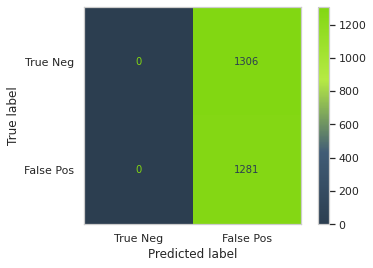

In [18]:
#dummy classifier
baseline = DummyClassifier()
executar_classificador (baseline, x_train, x_test, y_train)
y_pred_baseline = executar_classificador(baseline, x_train, x_test, y_train)

metricas (y_test, y_pred_baseline)

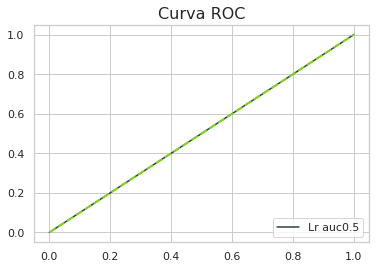

In [19]:
curva_roc(baseline, x_test, y_test)

## <font color=2C3E50>**04.1. SVC (Support-vector machine)**

> Classificar dados é uma tarefa comum em machine learning. Suponha que alguns pontos de dados pertençam a uma de duas classes e o objetivo seja decidir em qual classe um novo ponto de dados estará, o <font color=82D712>**SVC**</font> implementará a abordagem “um contra um” para essa classificação multiclasse. <sup>[[2]](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

<font color=82D712> **Importando Classificador**

In [20]:
from sklearn.svm import SVC

<font color=82D712> **Modelo**

O modelo tem a de Acurácia: 75.61%
O modelo tem a de Precisão: 72.20%
O modelo tem o de Recall: 82.51%
O modelo tem o de F1: 77.01%

A matrix de confusão do modelo é:


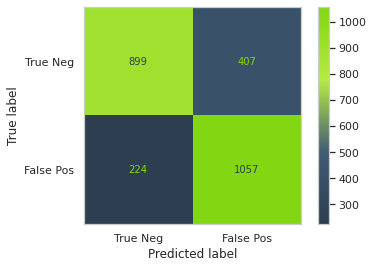

In [21]:
classificador_svc = SVC(probability=True, random_state=SEED)

y_pred_svc = executar_classificador(classificador_svc, x_train, x_test, y_train)

metricas(y_test, y_pred_svc)

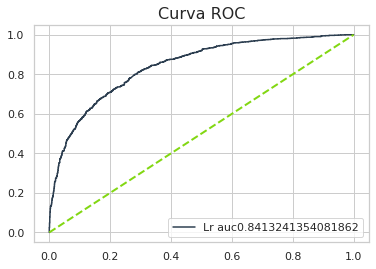

In [22]:
curva_roc(classificador_svc, x_test, y_test)

---
<font color=82D712 size="5">**Conclusões**</font>

Observa-se que o classificador apresenta um recall maior que os outros paramêtros. Quando um modelo tem alto recall, mas baixa precisão, retorna muitos resultados (vaiação de ≅ 10), mas a maioria de seus rótulos previstos está incorreta quando comparado aos rótulos de treinamento. O que pode ser identificado por essa curva roc inconsistente.


## <font color=2C3E50>**04.2. Arvore de decisão**

> As <font color=82D712>**Árvores de Decisão (TDs)**</font> são um método de aprendizado supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável target aprendendo regras de decisão simples inferidas a partir dos recursos de dados. Uma árvore pode ser vista como uma aproximação constante por partes. <sup>[[3]](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier)

<font color=82D712> **Importando Classificador**

In [23]:
from sklearn.tree import DecisionTreeClassifier

<font color=82D712> **Modelo**

O modelo tem a de Acurácia: 80.56%
O modelo tem a de Precisão: 78.99%
O modelo tem o de Recall: 82.75%
O modelo tem o de F1: 80.82%

A matrix de confusão do modelo é:


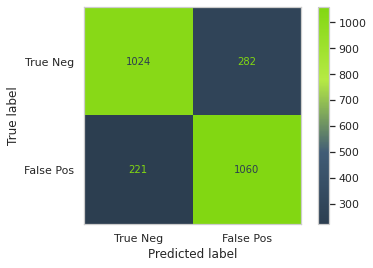

In [24]:
classificador_ar = DecisionTreeClassifier(max_depth=5, random_state=SEED)

y_pred_ar = executar_classificador(classificador_ar, x_train, x_test, y_train)

metricas(y_test, y_pred_ar)

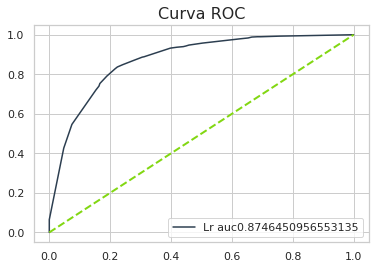

In [25]:
curva_roc(classificador_ar, x_test, y_test)

---


<font color=82D712 size="5">**Conclusões**</font>

Observa-se que o classificador de arvores de decisão também apresenta um recall maior que os outros paramêtros, mas, com uma variação bem menor (≅ 4). A curva roc deste modelo támbem performou melhor em relação anterior, se aprroximando mais do 1.


## <font color=2C3E50>**04.3. Random Forest**

Um <font color=82D712>**Random Forest**</font> é um meta estimador que ajusta vários classificadores de árvore de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o ajuste excessivo. O tamanho da subamostra é controlado com o parâmetro <font color=82D712>**`max_samples`**</font> se <font color=82D712>**`bootstrap=True (padrão)`**</font>, caso contrário, todo o conjunto de dados é usado para construir cada árvore. <sup>[[4]](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random#sklearn.ensemble.RandomForestClassifier)

<font color=82D712> **Importando Classificador**

In [26]:
from sklearn.ensemble import RandomForestClassifier

<font color=82D712> **Modelo**

O modelo tem a de Acurácia: 83.88%
O modelo tem a de Precisão: 83.33%
O modelo tem o de Recall: 84.31%
O modelo tem o de F1: 83.82%

A matrix de confusão do modelo é:


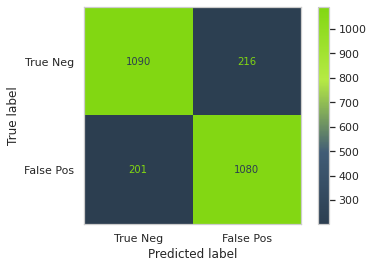

In [27]:
classificador_rf = RandomForestClassifier(random_state=SEED)

y_pred_rf = executar_classificador(classificador_rf, x_train, x_test, y_train)

metricas(y_test, y_pred_rf)

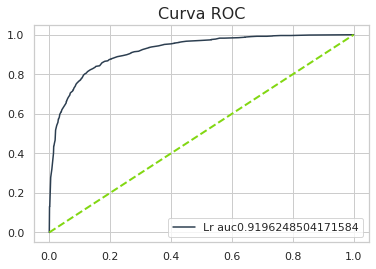

In [28]:
curva_roc(classificador_rf, x_test, y_test)

---


<font color=82D712 size="5">**Conclusões**</font>

Observa-se que o classificador de RandomForest apresenta um desempenho superior aos anteries e ainda que o recall esteja maior que os outros paramêtros a variação é muito menor (≅ 1). A curva roc deste modelo támbem performou melhor em relação anterior, se aprroximando mais do 1.

## <font color=2C3E50>**04.4. Comparando modelos**

<font color=82D712> **escolhendo um modelo ...**

In [29]:
classifiers = [y_pred_baseline, y_pred_svc, y_pred_ar, y_pred_rf]

acuracia = []
precisao = []
Recall = []
F1Score = []

for y_pred in classifiers:
  acuracia.append(metrics.accuracy_score(y_test, y_pred))
  precisao.append(metrics.precision_score(y_test, y_pred))
  Recall.append(metrics.recall_score(y_test, y_pred))
  F1Score.append(metrics.f1_score(y_test, y_pred))

comparando = pd.DataFrame(data = [acuracia, precisao, Recall, F1Score], 
             columns = ['baseline', 'SVC', 'Árvore', 'RandomForest'], 
             index = ['Acurácia', 'Precisão', 'Recall', 'F1-Score'])

def highlight_max(s):
    is_max = s == s.max()
    return ['color: #82D712' if cell else '' for cell in is_max]
  
comparando.style.apply(highlight_max, axis=1)

,baseline,SVC,Árvore,RandomForest
Acurácia,0.495168,0.756088,0.805566,0.838809
Precisão,0.495168,0.721995,0.789866,0.833333
Recall,1.000000,0.825137,0.827479,0.843091
F1-Score,0.662358,0.770128,0.808235,0.838184


---
<font color=82D712 size="5">**Conclusões**</font>

O modelo escolhido será o **Random Forest** pois apresentou melhor desempenho frente as metricas

# <font color=2C3E50>**05. Otimizando: <font color=82D712>Random Forest**

<font>Melhorar o modelo [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) utilizando o método [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

<font color=82D712> **Importando Estimador**

In [30]:
from sklearn.model_selection import GridSearchCV

<font color=82D712> **Otimizando**

In [31]:
n_estimators = np.arange(100, 200, step=20)	
criterion = ["gini", "entropy"]  
max_features = ["auto", "log2"]
max_depth = list(np.arange(2, 10, step=2))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [2, 4]
bootstrap = [True, False]

parametros = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [32]:
grid = GridSearchCV(classificador_rf, cv=3, n_jobs=-1, param_grid = parametros, scoring = 'recall')
grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 120, 140, 160, 180])},
             scoring='recall')

In [33]:
df_grid = pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score']]
df_grid.sort_values(by="rank_test_score", ).head()

,params,rank_test_score,mean_test_score
618,"{'bootstrap': True, 'criterion': 'entropy', 'm...",1,0.876701
601,"{'bootstrap': True, 'criterion': 'entropy', 'm...",2,0.876445
606,"{'bootstrap': True, 'criterion': 'entropy', 'm...",2,0.876445
617,"{'bootstrap': True, 'criterion': 'entropy', 'm...",2,0.876445
185,"{'bootstrap': True, 'criterion': 'gini', 'max_...",5,0.875674


In [34]:
df_grid.params[0]

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

Conforme o dataframe acima, o melhor resultado de f1 é produzido pelos parâmetros 

**`{'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}`**

O atributo .best_params_ pode ser usado também para obter os melhores parâmetros.

In [35]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 160}

<font color=82D712> **Novo Modelo**

O modelo tem a de Acurácia: 82.22%
O modelo tem a de Precisão: 78.61%
O modelo tem o de Recall: 88.06%
O modelo tem o de F1: 83.06%

A matrix de confusão do modelo é:


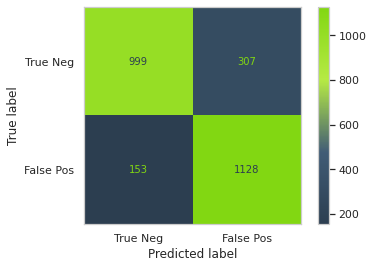

In [36]:
classificador_rfo = RandomForestClassifier(**grid.best_params_, random_state=SEED)

y_pred_rfo = executar_classificador(classificador_rfo, x_train, x_test, y_train)

metricas(y_test, y_pred_rfo)

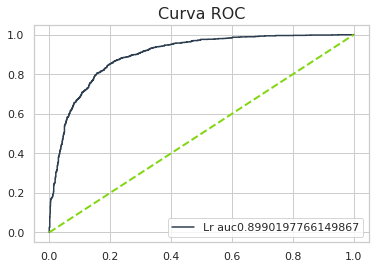

In [37]:
curva_roc(classificador_rfo, x_test, y_test)

---


<font color=82D712 size="5">**Conclusões**</font>

O novo modelo tem uma melhora de recall interessante, mas, uma perda de precisão e acuracia.<br>

|Random Forest        | Acurácia|Precisão|Recall|F1-Score|
|---------------------|---------|--------|------|--------|
|Antes da Otimização  |83.88%   |83.33%  |84.31%|83.82%  |
|Depois da Otimização |82.22%   |78.61%  |88.06%|83.06%  |

Logo, foi então criado um modelo otimizado capaz de prever o churn dos clientes da empresa. A seguir se faz necessario criar um dashboard para trasferir essas informações coletadas aos stakeholders.
<br>

---
<font color=82D712 size="2"><a href='https://colab.research.google.com/drive/1dr5ARLZ5a0NRIaGm5Lr5mPavn4hyNwVj'> **Próximo ➜**</a></font>